In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import pickle

In [3]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.shape

(1014, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


## Checking for missing values

In [7]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## Checking for outlier values

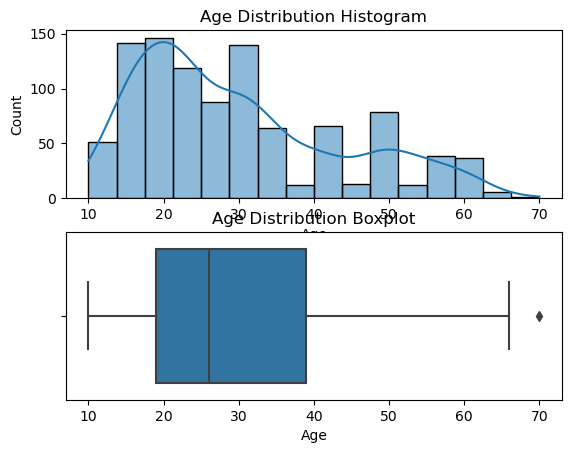

In [8]:
#cols = X.columns.values.tolist()
#for col in cols:
col = 'Age'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

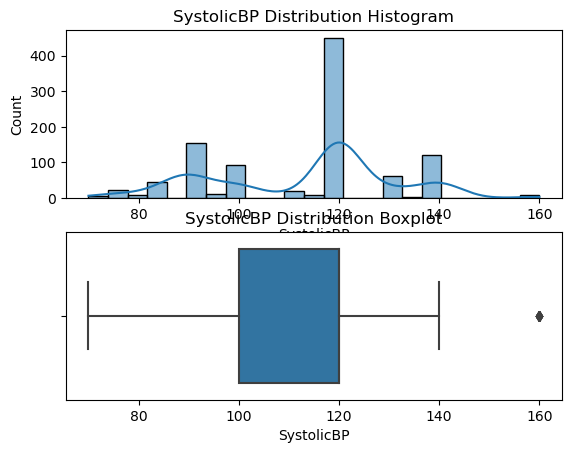

In [9]:
#cols = X.columns.values.tolist()
#for col in cols:
col = 'SystolicBP'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

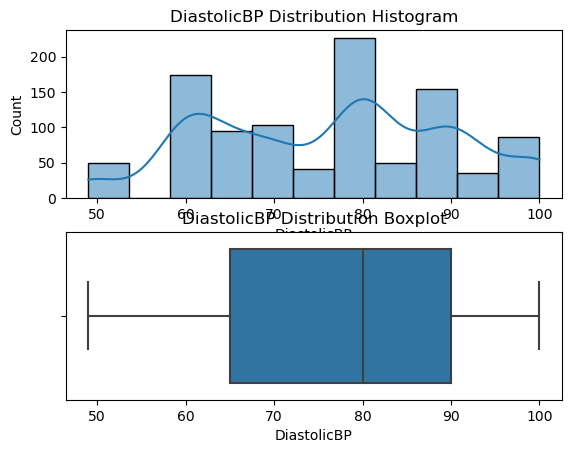

In [10]:
#cols = X.columns.values.tolist()
#for col in cols:
col = 'DiastolicBP'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

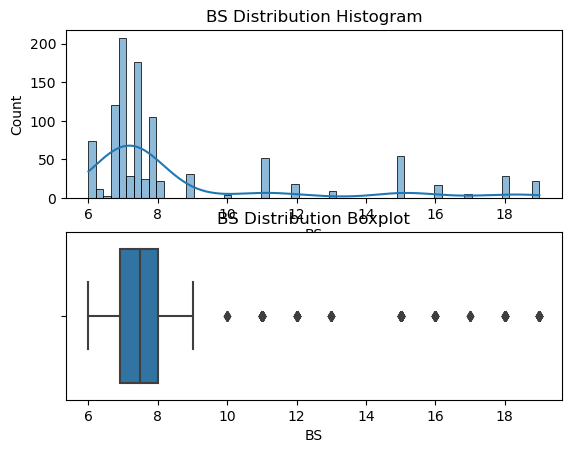

In [11]:
#cols = X.columns.values.tolist()
#for col in cols:
col = 'BS'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

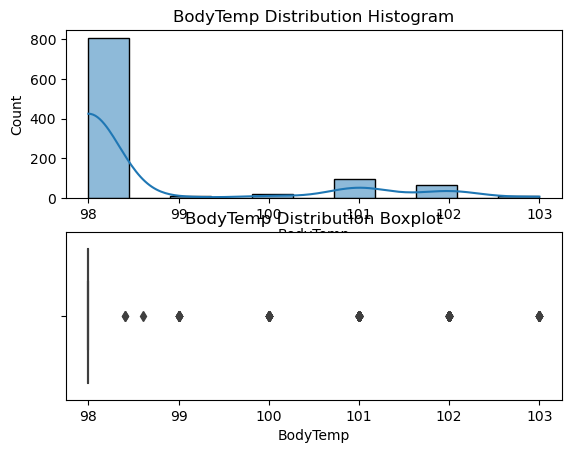

In [12]:
#cols = X.columns.values.tolist()
#for col in cols:
col = 'BodyTemp'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

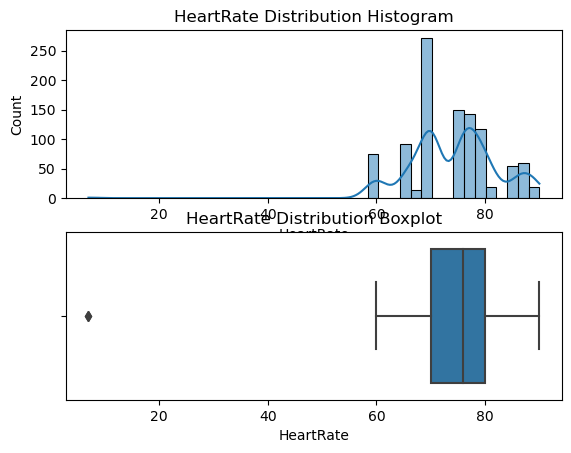

In [13]:
col = 'HeartRate'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

In [14]:
data = data.drop(data.index[data.HeartRate == 7])

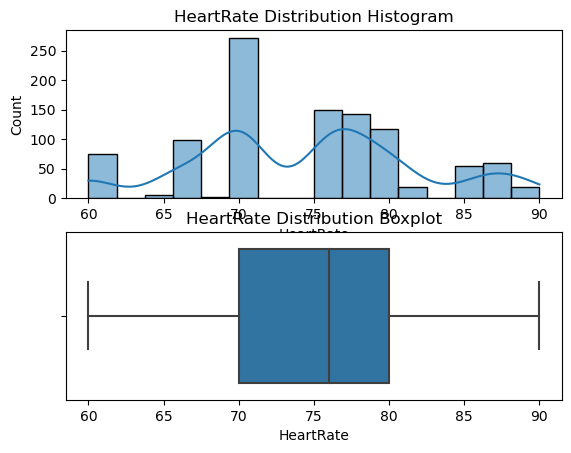

In [15]:
col = 'HeartRate'
f, ax = plt.subplots(2)
sns.histplot(data = data, x=col, kde = True, ax=ax[0])
sns.boxplot(data=data,x=col,ax=ax[1])
ax[0].set_title(f"{col} Distribution Histogram")
ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

In [16]:
x_train,x_test,y_train,y_test = split(X,y,test_size=0.2,random_state=1)

## Descriptive Analysis

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1012 non-null   int64  
 1   SystolicBP   1012 non-null   int64  
 2   DiastolicBP  1012 non-null   int64  
 3   BS           1012 non-null   float64
 4   BodyTemp     1012 non-null   float64
 5   HeartRate    1012 non-null   int64  
 6   RiskLevel    1012 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 63.2+ KB


In [18]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1012.0,NaN,NaN,NaN,29.899209,13.47356,10.0,19.0,26.0,39.0,70.0
SystolicBP,1012.0,NaN,NaN,NaN,113.184783,18.419618,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1012.0,NaN,NaN,NaN,76.463439,13.899372,49.0,65.0,80.0,90.0,100.0
BS,1012.0,NaN,NaN,NaN,8.727619,3.296583,6.0,6.9,7.5,8.0,19.0
BodyTemp,1012.0,NaN,NaN,NaN,98.666403,1.372421,98.0,98.0,98.0,98.0,103.0
HeartRate,1012.0,NaN,NaN,NaN,74.434783,7.521857,60.0,70.0,76.0,80.0,90.0
RiskLevel,1012,3,low risk,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visual Analysis

In [19]:
def num_plot(data,col):
    fig,ax = plt.subplots(1,2,figsize = (12,4))

    sns.histplot(data = data, x=col, kde = True, ax=ax[0])
    sns.boxplot(data=data,x=col,ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

plt.show()

## Univariate Analysis

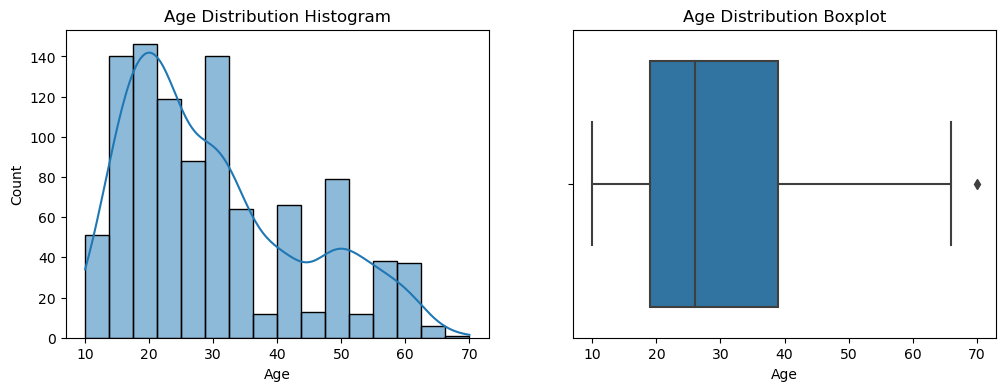

In [20]:
num_plot(data,'Age')

## Bivariate Analysis

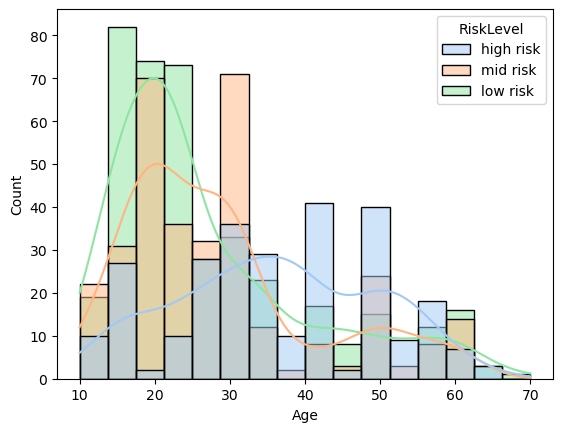

In [21]:
risk_order = ["high risk","mid risk","low risk"]
p_colors = sns.color_palette("pastel")
sns.histplot(data=data,x="Age",hue = "RiskLevel",kde=True,hue_order=risk_order,palette=p_colors)
plt.show()

Patients with low risk pregnancy lie in the lower age groups

## Multivariate Analysis

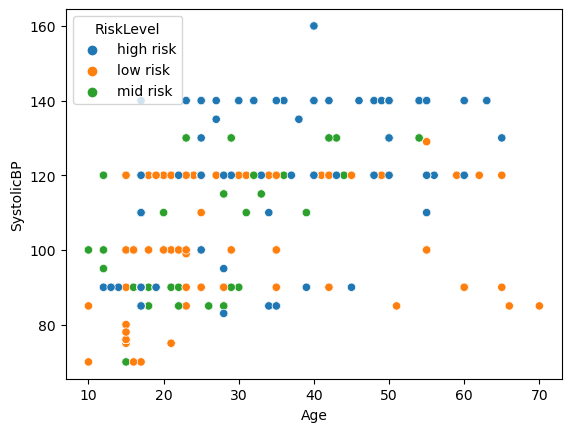

In [22]:
risk_order = ["high risk","mid risk","low risk"]
p_colors = sns.color_palette("pastel")
sns.scatterplot(data=data,x="Age",y="SystolicBP",hue = "RiskLevel")
plt.show()

Pregnant women with higher Systolic BP fall into the high risk category.

## Training ML models on the data

In [25]:
x_train,x_test,y_train,y_test = split(X,y)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_train_pred = dt.predict(x_train)
dt_test_pred = dt.predict(x_test)
train_acc = accuracy_score(y_train,dt_train_pred)
test_acc = accuracy_score(y_test,dt_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.9302631578947368
Testing accuracy : 0.8228346456692913


In [27]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
train_acc = accuracy_score(y_train,knn_train_pred)
test_acc = accuracy_score(y_test,knn_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.7921052631578948
Testing accuracy : 0.6811023622047244


In [29]:
svm = SVC()
svm.fit(x_train,y_train)
svm_train_pred = svm.predict(x_train)
svm_test_pred = svm.predict(x_test)
train_acc = accuracy_score(y_train,svm_train_pred)
test_acc = accuracy_score(y_test,svm_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.6210526315789474
Testing accuracy : 0.5787401574803149


In [30]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)
train_acc = accuracy_score(y_train,rfc_train_pred)
test_acc = accuracy_score(y_test,rfc_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.9302631578947368
Testing accuracy : 0.8307086614173228


In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)
train_acc = accuracy_score(y_train,lr_train_pred)
test_acc = accuracy_score(y_test,lr_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.6065789473684211
Testing accuracy : 0.5984251968503937


In [34]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)
bc_train_pred = bc.predict(x_train)
bc_test_pred = bc.predict(x_test)
train_acc = accuracy_score(y_train,bc_train_pred)
test_acc = accuracy_score(y_test,bc_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.9236842105263158
Testing accuracy : 0.8228346456692913


In [36]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_train_pred = abc.predict(x_train)
abc_test_pred = abc.predict(x_test)
train_acc = accuracy_score(y_train,abc_train_pred)
test_acc = accuracy_score(y_test,abc_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.6986842105263158
Testing accuracy : 0.6496062992125984


In [37]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_train_pred = gnb.predict(x_train)
gnb_test_pred = gnb.predict(x_test)
train_acc = accuracy_score(y_train,gnb_train_pred)
test_acc = accuracy_score(y_test,gnb_test_pred)

print("Training accuracy : " + str(train_acc))
print("Testing accuracy : " + str(test_acc))

Training accuracy : 0.6302631578947369
Testing accuracy : 0.610236220472441


In [38]:
print(classification_report(y_test,lr_test_pred))
confusion_matrix(y_test,lr_test_pred)

              precision    recall  f1-score   support

   high risk       0.78      0.74      0.76        66
    low risk       0.52      0.72      0.61        94
    mid risk       0.57      0.37      0.45        94

    accuracy                           0.60       254
   macro avg       0.62      0.61      0.61       254
weighted avg       0.61      0.60      0.59       254



array([[49, 13,  4],
       [ 4, 68, 22],
       [10, 49, 35]], dtype=int64)

In [39]:
print(classification_report(y_test,dt_test_pred))
confusion_matrix(y_test,dt_test_pred)

              precision    recall  f1-score   support

   high risk       0.86      0.94      0.90        66
    low risk       0.80      0.85      0.82        94
    mid risk       0.82      0.71      0.76        94

    accuracy                           0.82       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.82      0.82      0.82       254



array([[62,  0,  4],
       [ 3, 80, 11],
       [ 7, 20, 67]], dtype=int64)

In [40]:
print(classification_report(y_test,knn_test_pred))
confusion_matrix(y_test,knn_test_pred)

              precision    recall  f1-score   support

   high risk       0.80      0.80      0.80        66
    low risk       0.63      0.76      0.69        94
    mid risk       0.65      0.52      0.58        94

    accuracy                           0.68       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.68      0.68      0.68       254



array([[53,  6,  7],
       [ 4, 71, 19],
       [ 9, 36, 49]], dtype=int64)

In [42]:
print(classification_report(y_test,rfc_test_pred))
confusion_matrix(y_test,rfc_test_pred)

              precision    recall  f1-score   support

   high risk       0.86      0.91      0.88        66
    low risk       0.84      0.81      0.82        94
    mid risk       0.81      0.80      0.80        94

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.84       254
weighted avg       0.83      0.83      0.83       254



array([[60,  3,  3],
       [ 3, 76, 15],
       [ 7, 12, 75]], dtype=int64)

In [43]:
print(classification_report(y_test,svm_test_pred))
confusion_matrix(y_test,svm_test_pred)

              precision    recall  f1-score   support

   high risk       0.85      0.68      0.76        66
    low risk       0.49      0.85      0.62        94
    mid risk       0.56      0.23      0.33        94

    accuracy                           0.58       254
   macro avg       0.64      0.59      0.57       254
weighted avg       0.61      0.58      0.55       254



array([[45, 16,  5],
       [ 2, 80, 12],
       [ 6, 66, 22]], dtype=int64)

In [45]:
print(classification_report(y_test,gnb_test_pred))
confusion_matrix(y_test,gnb_test_pred)

              precision    recall  f1-score   support

   high risk       0.80      0.74      0.77        66
    low risk       0.55      0.89      0.68        94
    mid risk       0.54      0.23      0.33        94

    accuracy                           0.61       254
   macro avg       0.63      0.62      0.59       254
weighted avg       0.61      0.61      0.57       254



array([[49,  6, 11],
       [ 2, 84,  8],
       [10, 62, 22]], dtype=int64)

In [46]:
print(classification_report(y_test,abc_test_pred))
confusion_matrix(y_test,abc_test_pred)

              precision    recall  f1-score   support

   high risk       0.70      0.71      0.71        66
    low risk       0.64      0.79      0.71        94
    mid risk       0.61      0.47      0.53        94

    accuracy                           0.65       254
   macro avg       0.65      0.66      0.65       254
weighted avg       0.65      0.65      0.64       254



array([[47,  6, 13],
       [ 5, 74, 15],
       [15, 35, 44]], dtype=int64)

In [48]:
print(classification_report(y_test,bc_test_pred))
confusion_matrix(y_test,bc_test_pred)

              precision    recall  f1-score   support

   high risk       0.82      0.89      0.86        66
    low risk       0.85      0.82      0.83        94
    mid risk       0.80      0.78      0.79        94

    accuracy                           0.82       254
   macro avg       0.82      0.83      0.83       254
weighted avg       0.82      0.82      0.82       254



array([[59,  3,  4],
       [ 3, 77, 14],
       [10, 11, 73]], dtype=int64)

In [68]:
#create param
model_param = {
'DecisionTreeclassifier': {
'model' :DecisionTreeClassifier(),
'param':{
'criterion': ['gini', 'entropy'],
'max_depth' : [4,5,6,7, 8, 20,50]
}
},
'KNeighborsclassifier':{
'model' :KNeighborsClassifier (),
'param':{
'n_neighbors': [5,10,15,20, 25]
}
},
'svc': {
'model' :SVC(),
'param':{
'kernel':['rbf', 'linear', 'sigmoid'],
'C': [0.1, 1, 10, 180]
          }
},
          
'RandomForestclassifier': {
'model': RandomForestClassifier (),
'param': {
'n_estimators': [10,20,50,100,200, 500],
'max_features': ['auto','sqrt','log2'],
'max_depth' : [4,5,6, 7, 8, 20,30,50],
'criterion' :['gini','entropy ']
}
},
'LogisticRegression':{
'model': LogisticRegression(),
'param':{
'C':np.logspace (-3,3,7),
'penalty':["11", "12"]
}
},
'Baggingclassifier':{
'model': BaggingClassifier(),
'param':{
'n_estimators': [10, 30, 50, 100, 150, 200],
'random_state': [1,3,5,7,9,15, 50,100]
}
},
'AdaBoostclassifier':{
'model': AdaBoostClassifier(),
'param':{
"n_estimators": [10,30, 50, 100, 150, 200],
"random_state": [1,3,5,7,9,15, 50,100]
}    
}
}


In [69]:
scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp ['param'], cv=5, return_train_score=False)
    model_selection.fit (x_train,y_train)
    scores.append ({
    'model': model_name,
    'best_score': model_selection.best_score_,
    'best_params': model_selection.best_params_})

ValueError: 
All the 70 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'none' (deprecated), 'elasticnet', 'l1'} or None. Got '11' instead.

--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\iamsm\anaconda3\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l2', 'none' (deprecated), 'elasticnet', 'l1'} or None. Got '12' instead.


In [70]:
pd.set_option('display.max_colwidth',-1)
df_model_score = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeclassifier,0.805263,"{'criterion': 'entropy', 'max_depth': 50}"
1,KNeighborsclassifier,0.648684,{'n_neighbors': 10}
2,svc,0.702632,"{'C': 180, 'kernel': 'rbf'}"
3,RandomForestclassifier,0.828947,"{'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}"


In [74]:
model_randomforest = RandomForestClassifier( criterion = 'gini', max_depth = 20, max_features = 'sqrt',n_estimators=50)
model_randomforest.fit(x_train,y_train)


RandomForestClassifier(max_depth=20, n_estimators=50)

In [75]:
result = model_randomforest.score(x_train,y_train)*100
result

93.02631578947368

In [77]:
result = model_randomforest.score(x_test,y_test)*100
result

84.64566929133859

In [80]:
pickle.dump(model_randomforest,open("model_randomforest.pkl",'wb'))